In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageOps
import sklearn

In [2]:
train_normal_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\train\NORMAL"
train_pneumonia_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\train\PNEUMONIA"
val_normal_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\val\NORMAL"
val_pneumonia_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\val\PNEUMONIA"
test_normal_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\test\NORMAL"
test_pneumonia_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\test\PNEUMONIA"
paths = [train_normal_path, train_pneumonia_path, val_normal_path, val_pneumonia_path, test_normal_path, test_pneumonia_path]

In [3]:
imagenes_train_normal = []
imagenes_train_pneumonia = []
imagenes_val_normal = []
imagenes_val_pneumonia = []
imagenes_test_normal = []
imagenes_test_pneumonia = []
ancho, alto = (400, 400)
imagenes = [imagenes_train_normal, imagenes_train_pneumonia, imagenes_val_normal, imagenes_val_pneumonia, imagenes_test_normal, imagenes_test_pneumonia]

for i, path in enumerate(paths):
    for filename in os.listdir(path):
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img = Image.open(f)
            img = img.resize(size = (ancho, alto))
            img = ImageOps.grayscale(img)
            img = np.asarray(img)
            imagenes[i].append(img)

In [4]:
print(len(imagenes_train_normal))
print(len(imagenes_train_pneumonia))
print(len(imagenes_val_normal))
print(len(imagenes_val_pneumonia))
print(len(imagenes_test_normal))
print(len(imagenes_test_pneumonia))

1341
3875
8
8
234
390


In [5]:
imagenes_train_normal = np.array(imagenes_train_normal)
imagenes_train_pneumonia = np.array(imagenes_train_pneumonia)
imagenes_val_normal = np.array(imagenes_val_normal)
imagenes_val_pneumonia = np.array(imagenes_val_pneumonia)
imagenes_test_normal = np.array(imagenes_test_normal)
imagenes_test_pneumonia = np.array(imagenes_test_pneumonia)

In [6]:
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\normal", imagenes_train_normal)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\pneumonia", imagenes_train_pneumonia)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\normal", imagenes_val_normal)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\pneumonia", imagenes_val_pneumonia)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\normal", imagenes_test_normal)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\pneumonia", imagenes_test_pneumonia)

# Cargar las imagenes transformadas a partir de aca

In [2]:
ancho, alto = (300, 300)
train_normal = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\normal.npy")
train_pneumonia = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\pneumonia.npy")
val_normal = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\normal.npy")
val_pneumonia = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\pneumonia.npy")
test_normal = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\normal.npy")
test_pneumonia = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\pneumonia.npy")

In [3]:
x_train = np.concatenate((train_normal, train_pneumonia), axis = 0)
x_val = np.concatenate((val_normal, val_pneumonia), axis = 0)
x_test = np.concatenate((test_normal, test_pneumonia), axis = 0)

In [4]:
x_train.shape

(5216, 400, 400)

# Los normales se clasificaran como 1 y pneumonia como 0

In [5]:
y_train_normal = np.ones(len(train_normal))
y_train_pneumonia = np.zeros(len(train_pneumonia))
y_val_normal = np.ones(len(val_normal))
y_val_pneumonia = np.zeros(len(val_pneumonia))
y_test_normal = np.ones(len(test_normal))
y_test_pneumonia = np.zeros(len(test_pneumonia))

In [6]:
y_train = np.concatenate((y_train_normal, y_train_pneumonia), axis = 0)
y_val = np.concatenate((y_val_normal, y_val_pneumonia), axis = 0)
y_test = np.concatenate((y_test_normal, y_test_pneumonia), axis = 0)

In [7]:
x_train, y_train = sklearn.utils.shuffle(x_train, y_train)
x_val, y_val = sklearn.utils.shuffle(x_val, y_val)
x_test, y_test = sklearn.utils.shuffle(x_test,y_test)

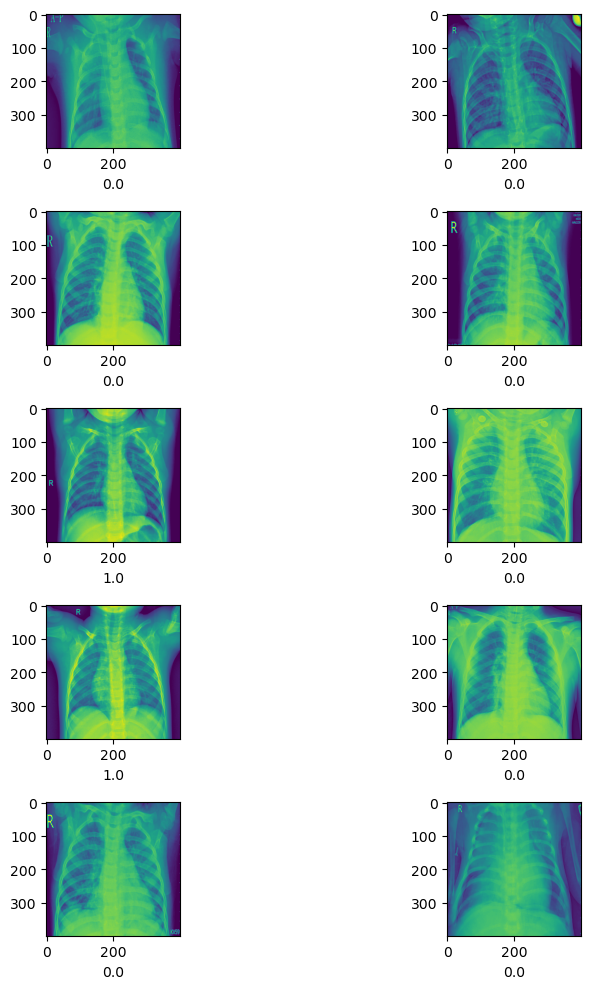

In [8]:
fig = plt.figure(figsize = (10,10))
for i in range(1,11):
    ax = fig.add_subplot(5,2,i)
    ax.imshow(x_train[i])
    ax.set_xlabel(y_train[i])
fig.tight_layout()


In [9]:
ancho, alto = (400, 400)
epochs = 10

In [10]:
x_train = np.concatenate((x_train, x_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

In [11]:
model = Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (ancho, alto, 1)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(64, (5,5), activation = "relu"))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 396, 396, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 64)                9

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs = epochs, 
                    validation_split = 0.2)

Epoch 1/10
131/131 [==============================] - 260s 2s/step - loss: 5.0472 - accuracy: 0.8327 - val_loss: 0.1949 - val_accuracy: 0.9303
Epoch 2/10
131/131 [==============================] - 259s 2s/step - loss: 0.1445 - accuracy: 0.9472 - val_loss: 0.2029 - val_accuracy: 0.9245
Epoch 3/10
131/131 [==============================] - 259s 2s/step - loss: 0.1382 - accuracy: 0.9481 - val_loss: 0.3343 - val_accuracy: 0.8797
Epoch 4/10
131/131 [==============================] - 259s 2s/step - loss: 0.2425 - accuracy: 0.9152 - val_loss: 0.2368 - val_accuracy: 0.9179
Epoch 5/10
131/131 [==============================] - 260s 2s/step - loss: 0.2072 - accuracy: 0.9240 - val_loss: 0.2278 - val_accuracy: 0.9131
Epoch 6/10
131/131 [==============================] - 260s 2s/step - loss: 0.1441 - accuracy: 0.9465 - val_loss: 0.2163 - val_accuracy: 0.9169
Epoch 7/10
131/131 [==============================] - 260s 2s/step - loss: 0.1560 - accuracy: 0.9410 - val_loss: 0.2949 - val_accuracy: 0.9341

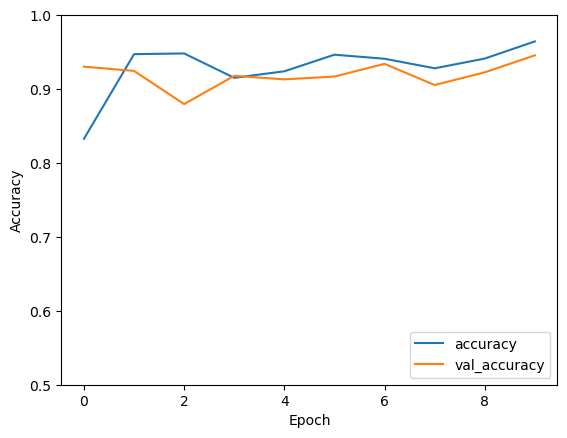

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

20/20 - 10s - loss: 1.5643 - accuracy: 0.8013 - 10s/epoch - 498ms/step


In [16]:
model.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\model.keras")

# Predecir

In [38]:
ruta_imagen = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\imagen_prueba.jpg" #La imagen es de una persona con neumonia
img = Image.open(ruta_imagen)
img = img.resize(size = (ancho, alto))
img = ImageOps.grayscale(img)
img = np.asarray(img)

In [39]:
img

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

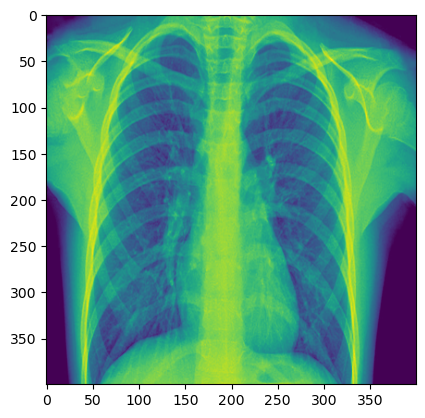

In [40]:
plt.imshow(img)

In [41]:
img = img.reshape(1, ancho, alto)

In [42]:
img

array([[[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [1, 1, 2, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [43]:
model.predict(img)

1/1 [==============================] - 0s 32ms/step


array([[0.97254544, 0.02745452]], dtype=float32)

In [44]:
model.predict(x_train[0].reshape(1,ancho,alto))

1/1 [==============================] - 0s 32ms/step


array([[1.000000e+00, 7.585847e-13]], dtype=float32)